<a href="https://colab.research.google.com/github/cRED-f/pytorch-deep-learning/blob/main/ml_and_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

- means the line of best fit
- y^ = mx + b (or ax + b)

In [225]:
import torch as t
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
#gererate 30 data points
N = 20

#random data on the x-axis in (-5,+5)
X=np.random.random(N) * 10 - 5

# a line plus some noise
Y= 0.5 * X - 1 + np.random.random(N)

#this is the correct model to use with MSE loss

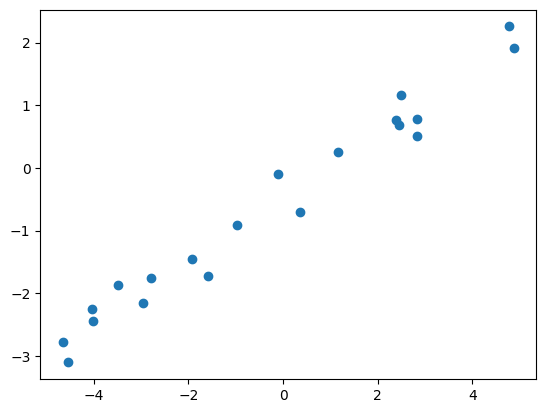

In [227]:
#plot the data
plt.scatter(X,Y);

## create the linear regression model

In [228]:
model = nn.Linear(1,1)

In [229]:
#Loss and optimizer
criterion = nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(),lr=0.1)

In [230]:
# in ml we want our data to be of shape
# (num_samples x number_dimension)
X = X.reshape(N,1)
Y= Y.reshape(N,1)

# pytorch use Float32 by default whereas numpy use float64
inputs = t.from_numpy(X.astype(np.float32))
targets= t.from_numpy(Y.astype(np.float32))

In [231]:
type(inputs)

torch.Tensor

## Train the model

In [232]:
n_epoch = 30
losses = []
for i in range(n_epoch):
  #zero parameter gradients
  optimizer.zero_grad()

  #forward pass
  outputs = model(inputs)
  loss = criterion(outputs , targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  #backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {i+1}/{n_epoch}, loss: {loss.item():.4f}')

Epoch 1/30, loss: 2.3976
Epoch 2/30, loss: 2.0852
Epoch 3/30, loss: 1.8164
Epoch 4/30, loss: 1.5847
Epoch 5/30, loss: 1.3844
Epoch 6/30, loss: 1.2112
Epoch 7/30, loss: 1.0611
Epoch 8/30, loss: 0.9310
Epoch 9/30, loss: 0.8181
Epoch 10/30, loss: 0.7202
Epoch 11/30, loss: 0.6352
Epoch 12/30, loss: 0.5613
Epoch 13/30, loss: 0.4972
Epoch 14/30, loss: 0.4415
Epoch 15/30, loss: 0.3932
Epoch 16/30, loss: 0.3511
Epoch 17/30, loss: 0.3146
Epoch 18/30, loss: 0.2829
Epoch 19/30, loss: 0.2553
Epoch 20/30, loss: 0.2314
Epoch 21/30, loss: 0.2106
Epoch 22/30, loss: 0.1925
Epoch 23/30, loss: 0.1768
Epoch 24/30, loss: 0.1632
Epoch 25/30, loss: 0.1513
Epoch 26/30, loss: 0.1410
Epoch 27/30, loss: 0.1320
Epoch 28/30, loss: 0.1243
Epoch 29/30, loss: 0.1175
Epoch 30/30, loss: 0.1116


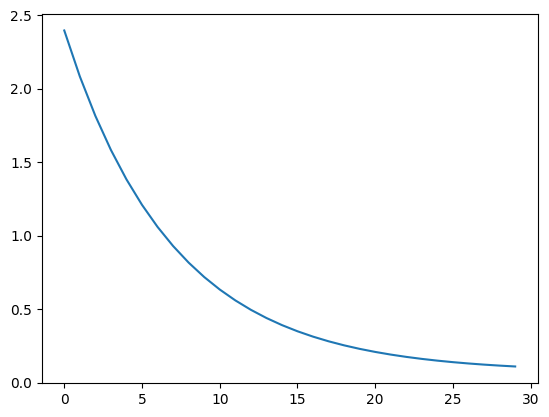

In [233]:
plt.plot(losses)

## plot the graph

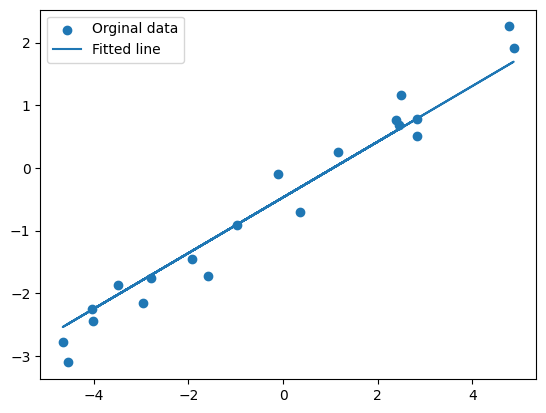

In [234]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label='Orginal data')
plt.plot(X,predicted,label='Fitted line')
plt.legend()
plt.show()

In [235]:
# in order to test the efficiency of the model , synthetic data is usefull


w= model.weight.data.numpy()
b= model.bias.data.numpy()
print(w,b)

[[0.44411045]] [-0.46973675]


## Moores Law

##### Moore's law is the observation that the number of transistors in an integrated circuit (IC) doubles about every two years

In [236]:
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1) # make it a 2D array of size N x D where D = 1
Y = data[:,1].reshape(-1,1)

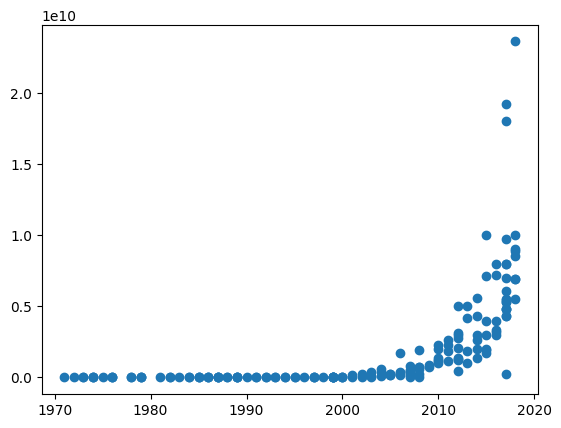

In [237]:
plt.scatter(X,Y)

### since we want linear model


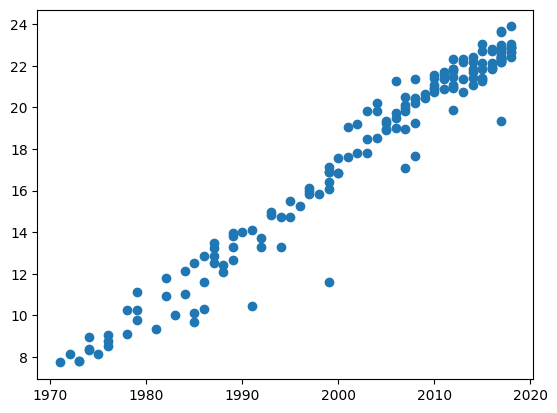

In [238]:
Y= np.log(Y)
plt.scatter(X,Y);

### scale and center both the x and y axes

In [239]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

#normalize
X = (X-mx)/sx
Y = (Y-my)/sy

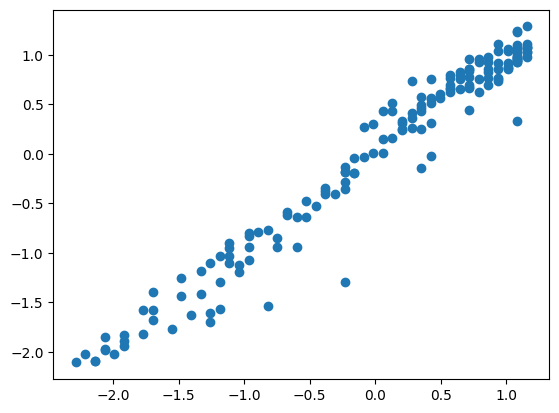

In [240]:
plt.scatter(X,Y)

### convert to float32

In [241]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

### create linear regression model

In [242]:
model = nn.Linear(1,1)

### loss and optimizer

In [243]:
criterion = nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(),lr=0.1,momentum=0.7)

In [244]:
inputs = t.from_numpy(X)
targets = t.from_numpy(Y)

In [245]:
type(inputs)

torch.Tensor

### train the model

In [246]:
n_epoch = 100
losses = []
for i in range(n_epoch):
  #zero parameter gradients
  optimizer.zero_grad()

  #forward pass
  outputs = model(inputs)
  loss = criterion(outputs , targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  #backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {i+1}/{n_epoch}, loss: {loss.item():.4f}')

Epoch 1/100, loss: 0.9965
Epoch 2/100, loss: 0.6516
Epoch 3/100, loss: 0.2780
Epoch 4/100, loss: 0.0731
Epoch 5/100, loss: 0.0425
Epoch 6/100, loss: 0.0894
Epoch 7/100, loss: 0.1248
Epoch 8/100, loss: 0.1185
Epoch 9/100, loss: 0.0863
Epoch 10/100, loss: 0.0554
Epoch 11/100, loss: 0.0402
Epoch 12/100, loss: 0.0393
Epoch 13/100, loss: 0.0436
Epoch 14/100, loss: 0.0462
Epoch 15/100, loss: 0.0451
Epoch 16/100, loss: 0.0422
Epoch 17/100, loss: 0.0396
Epoch 18/100, loss: 0.0386
Epoch 19/100, loss: 0.0386
Epoch 20/100, loss: 0.0390
Epoch 21/100, loss: 0.0392
Epoch 22/100, loss: 0.0390
Epoch 23/100, loss: 0.0388
Epoch 24/100, loss: 0.0386
Epoch 25/100, loss: 0.0385
Epoch 26/100, loss: 0.0385
Epoch 27/100, loss: 0.0385
Epoch 28/100, loss: 0.0385
Epoch 29/100, loss: 0.0385
Epoch 30/100, loss: 0.0385
Epoch 31/100, loss: 0.0385
Epoch 32/100, loss: 0.0385
Epoch 33/100, loss: 0.0385
Epoch 34/100, loss: 0.0385
Epoch 35/100, loss: 0.0385
Epoch 36/100, loss: 0.0385
Epoch 37/100, loss: 0.0385
Epoch 38/1

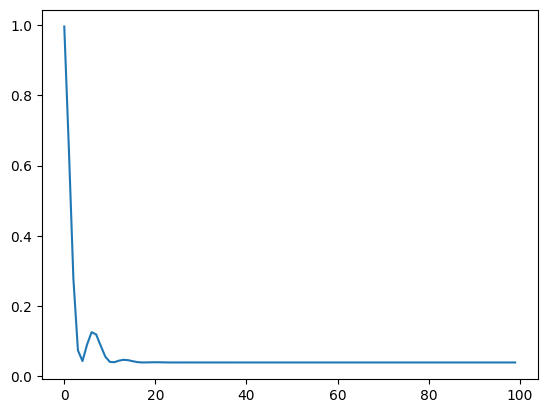

In [247]:
plt.plot(losses);

### plot the graph

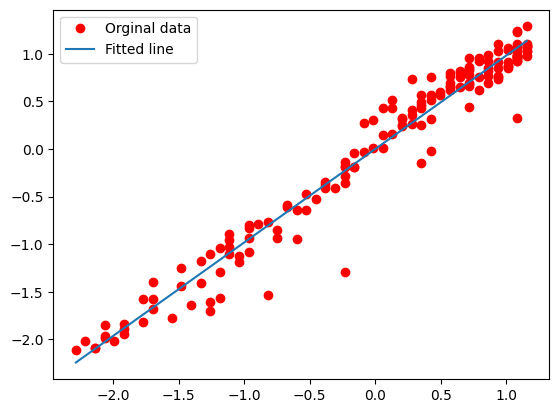

In [248]:
predicted = model(t.from_numpy(X)).detach().numpy()
plt.plot(X,Y,'ro',label='Orginal data')
plt.plot(X,predicted,label='Fitted line')
plt.legend()
plt.show()

### train weight of the model

In [249]:
w = model.weight.data.numpy()
print(w)

[[0.9805711]]


# Linear Classification



1.   load in the data
2.   create the model
3.   train the model
4.   evaluate the model


### load the data

In [250]:

from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()


type(data)

sklearn.utils._bunch.Bunch

In [251]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [252]:
data.data.shape #so it has 569 samples and 30 features

(569, 30)

In [253]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [254]:
data.target.shape #so the target == data same samples

(569,)

In [255]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [256]:
data.feature_names.shape

(30,)

### create the model

In [257]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33)

N , D = X_train.shape

### scale the data

In [258]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


### build the model with pytorch

In [259]:
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

### loss and optimizer

In [260]:
criterion = nn.BCELoss()
optimizer = t.optim.Adam(model.parameters())

### convert data into torch tensors

In [261]:
X_train = t.from_numpy(X_train.astype(np.float32))
X_test = t.from_numpy(X_test.astype(np.float32))
y_train = t.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = t.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)

### train the model

In [262]:


n_epoch = 1000

# stuff to store
train_losses = np.zeros(n_epoch)
test_losses = np.zeros(n_epoch)


for i in range(n_epoch):
  #zero parameter gradients
  optimizer.zero_grad()

  #forward pass
  outputs = model(X_train)
  loss = criterion(outputs , y_train)


  #backward and optimize
  loss.backward()
  optimizer.step()

  # get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test , y_test)

  # save losses
  train_losses[i] = loss.item()
  test_losses[i] = loss_test.item()


  if (i + 1) % 50 == 0:
    print(f'Epoch {i+1}/{n_epoch},train loss: {loss.item():.4f}, test loss: {loss_test.item()}')

Epoch 50/1000,train loss: 0.3436, test loss: 0.34484416246414185
Epoch 100/1000,train loss: 0.2664, test loss: 0.2640257775783539
Epoch 150/1000,train loss: 0.2220, test loss: 0.21605367958545685
Epoch 200/1000,train loss: 0.1932, test loss: 0.18497030436992645
Epoch 250/1000,train loss: 0.1728, test loss: 0.16349439322948456
Epoch 300/1000,train loss: 0.1576, test loss: 0.14788635075092316
Epoch 350/1000,train loss: 0.1458, test loss: 0.13607850670814514
Epoch 400/1000,train loss: 0.1363, test loss: 0.12685970962047577
Epoch 450/1000,train loss: 0.1285, test loss: 0.11948228627443314
Epoch 500/1000,train loss: 0.1220, test loss: 0.1134619414806366
Epoch 550/1000,train loss: 0.1164, test loss: 0.10847130417823792
Epoch 600/1000,train loss: 0.1116, test loss: 0.104280985891819
Epoch 650/1000,train loss: 0.1075, test loss: 0.10072503983974457
Epoch 700/1000,train loss: 0.1038, test loss: 0.09768034517765045
Epoch 750/1000,train loss: 0.1005, test loss: 0.09505338966846466
Epoch 800/1000,

### plot the graph

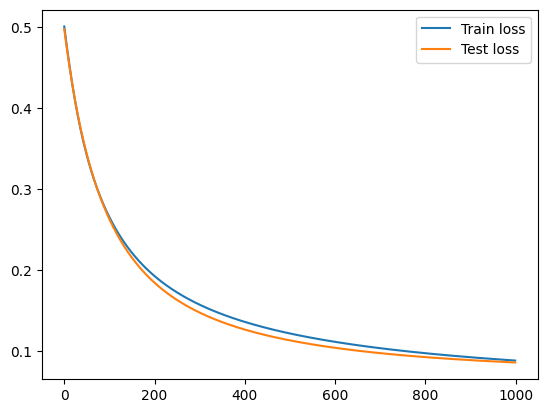

In [263]:
plt.plot(train_losses,label='Train loss')
plt.plot(test_losses,label='Test loss')
plt.legend()
plt.show()

### Accuracy of our model(evaluate the model)

In [264]:
with t.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_accuracy = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_accuracy = np.mean(y_test.numpy() == p_test)
print(f'Train acc: {train_accuracy:.4f}, Test acc: {test_accuracy:.4f}')

Train acc: 0.9843, Test acc: 0.9574


# Save the model



In [288]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2373, -0.5054, -0.4242, -0.4427, -0.1698, -0.1568, -0.3396, -0.2964,
                       -0.0669,  0.2752, -0.5623,  0.1873, -0.5350, -0.2581, -0.0710,  0.4093,
                       -0.0941, -0.1291,  0.2627,  0.3223, -0.5084, -0.6575, -0.5244, -0.4159,
                       -0.3374, -0.1732, -0.3968, -0.3100, -0.4168, -0.3478]])),
             ('0.bias', tensor([0.5532]))])

In [289]:
# save the model
t.save(model.state_dict(), 'myModel.pt')

In [267]:
!ls

moore.csv  myModel.pt  sample_data


In [290]:
model3 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model3.load_state_dict(t.load('myModel.pt'))

<All keys matched successfully>

In [291]:
with t.no_grad():
  p_train = model3(X_train)
  p_train = np.round(p_train.numpy())
  train_accuracy = np.mean(y_train.numpy() == p_train)

  p_test = model3(X_test)
  p_test = np.round(p_test.numpy())
  test_accuracy = np.mean(y_test.numpy() == p_test)
print(f'Train acc: {train_accuracy:.4f}, Test acc: {test_accuracy:.4f}')

Train acc: 0.9764, Test acc: 0.9894


# download the model

In [270]:
from google.colab import files
files.download('myModel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Linear classification with Logits

### load the data

In [350]:
from sklearn.datasets import load_breast_cancer

### create the model

In [351]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.2)

N , D = X_train.shape

### scale the data

In [352]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


### build the model with pytorch

In [353]:
model4 = nn.Linear(D,1) # already include sigmoid this time so we no need to write sigmoid



### Loss and Optimizer

In [354]:
criterion = nn.BCEWithLogitsLoss()
optimizer = t.optim.Adam(model4.parameters())

### convert the data into torch tensors

In [355]:
X_train = t.from_numpy(X_train.astype(np.float32))
X_test = t.from_numpy(X_test.astype(np.float32))
y_train = t.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = t.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)

### train the model

In [356]:


n_epoch = 1000

# stuff to store
train_losses = np.zeros(n_epoch)
test_losses = np.zeros(n_epoch)


for i in range(n_epoch):
  #zero parameter gradients
  optimizer.zero_grad()

  #forward pass
  outputs = model4(X_train)
  loss = criterion(outputs , y_train)


  #backward and optimize
  loss.backward()
  optimizer.step()

  # get test loss
  outputs_test = model4(X_test)
  loss_test = criterion(outputs_test , y_test)

  # save losses
  train_losses[i] = loss.item()
  test_losses[i] = loss_test.item()


  if (i + 1) % 50 == 0:
    print(f'Epoch {i+1}/{n_epoch},train loss: {loss.item():.4f}, test loss: {loss_test.item()}')

Epoch 50/1000,train loss: 0.4676, test loss: 0.4982861876487732
Epoch 100/1000,train loss: 0.3426, test loss: 0.373612642288208
Epoch 150/1000,train loss: 0.2755, test loss: 0.3064015805721283
Epoch 200/1000,train loss: 0.2339, test loss: 0.26439353823661804
Epoch 250/1000,train loss: 0.2054, test loss: 0.23554933071136475
Epoch 300/1000,train loss: 0.1846, test loss: 0.2144540697336197
Epoch 350/1000,train loss: 0.1688, test loss: 0.19830498099327087
Epoch 400/1000,train loss: 0.1563, test loss: 0.18551105260849
Epoch 450/1000,train loss: 0.1461, test loss: 0.17510518431663513
Epoch 500/1000,train loss: 0.1376, test loss: 0.1664658635854721
Epoch 550/1000,train loss: 0.1304, test loss: 0.1591745913028717
Epoch 600/1000,train loss: 0.1243, test loss: 0.15293854475021362
Epoch 650/1000,train loss: 0.1189, test loss: 0.14754603803157806
Epoch 700/1000,train loss: 0.1142, test loss: 0.14283999800682068
Epoch 750/1000,train loss: 0.1101, test loss: 0.13870102167129517
Epoch 800/1000,train 

### plot the graph

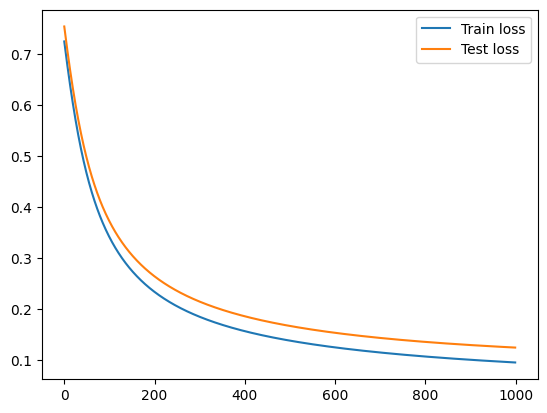

In [357]:
plt.plot(train_losses,label='Train loss')
plt.plot(test_losses,label='Test loss')
plt.legend()
plt.show()

### Accuracy of our model(evaluate the model)

In [358]:
with t.no_grad():
  p_train = model4(X_train)
  p_train = np.round(p_train.numpy()>0)
  train_accuracy = np.mean(y_train.numpy() == p_train)

  p_test = model4(X_test)
  p_test = np.round(p_test.numpy()>0)
  test_accuracy = np.mean(y_test.numpy() == p_test)
print(f'Train acc: {train_accuracy:.4f}, Test acc: {test_accuracy:.4f}')

Train acc: 0.9890, Test acc: 0.9561
